In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from statsmodels.tsa.seasonal import seasonal_decompose  
from statsmodels.tsa.holtwinters import ExponentialSmoothing  
from statsmodels.tsa.statespace.sarimax import SARIMAX  


In [3]:
retail_df = pd.read_csv(r'C:\Users\DELL\Downloads\retail_sales_dataset (1).csv')

In [4]:
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

# Set Date as index
retail_df.set_index('Date', inplace=True)

# Preview
print(retail_df.head())

            Unnamed: 0 Store_ID Product_Category  Units_Sold  Unit_Price  \
Date                                                                       
2021-01-01           0  Store_1      Electronics         122         440   
2021-01-01           1  Store_1          Grocery         368         275   
2021-01-01           2  Store_1         Clothing         126          76   
2021-01-01           3  Store_1        Furniture         208          25   
2021-01-01           4  Store_1             Toys         122         126   

             Sales Promotion  
Date                          
2021-01-01   53680        No  
2021-01-01  101200        No  
2021-01-01    9576        No  
2021-01-01    5200        No  
2021-01-01   15372       Yes  


In [5]:
monthly_sales = retail_df.resample('M').sum()['Sales']
# monthly_sales = df[(df['Store_ID'] == 'Store_1') & (df['Product_Category'] == 'Electronics')].resample('M').sum()['Sales']

print(monthly_sales.head())

Date
2021-01-31    12256194
2021-02-28           0
2021-03-31           0
2021-04-30           0
2021-05-31           0
Freq: ME, Name: Sales, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3328\200583208.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = retail_df.resample('M').sum()['Sales']


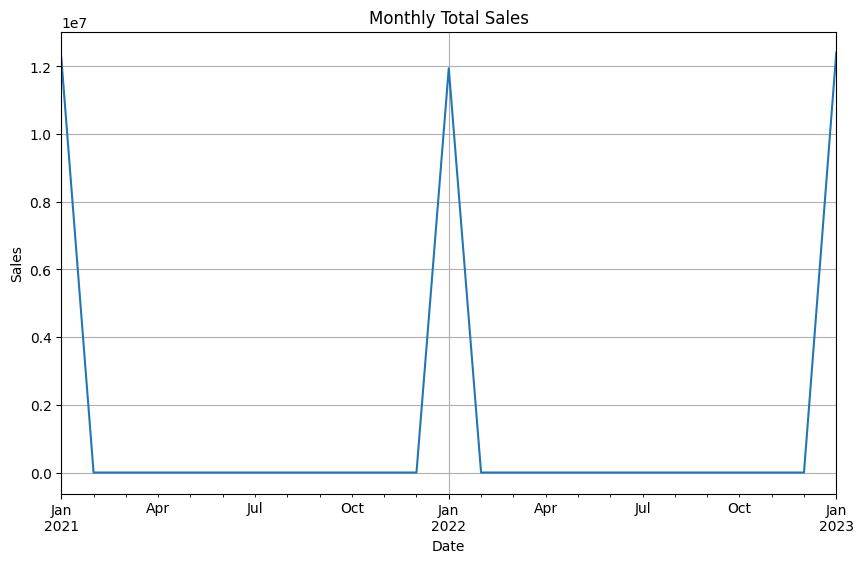

In [6]:
monthly_sales.plot(figsize=(10,6))
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


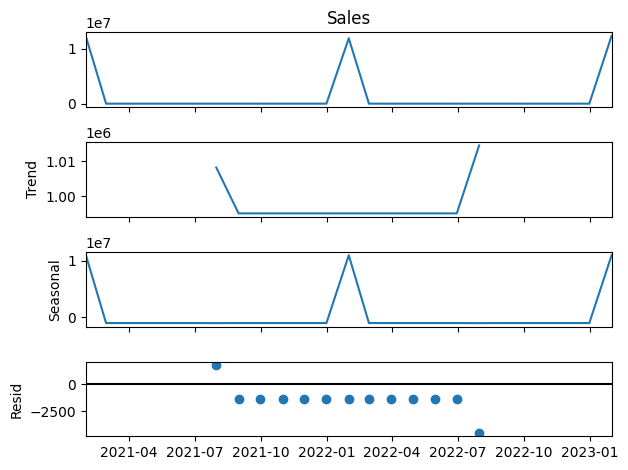

In [7]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


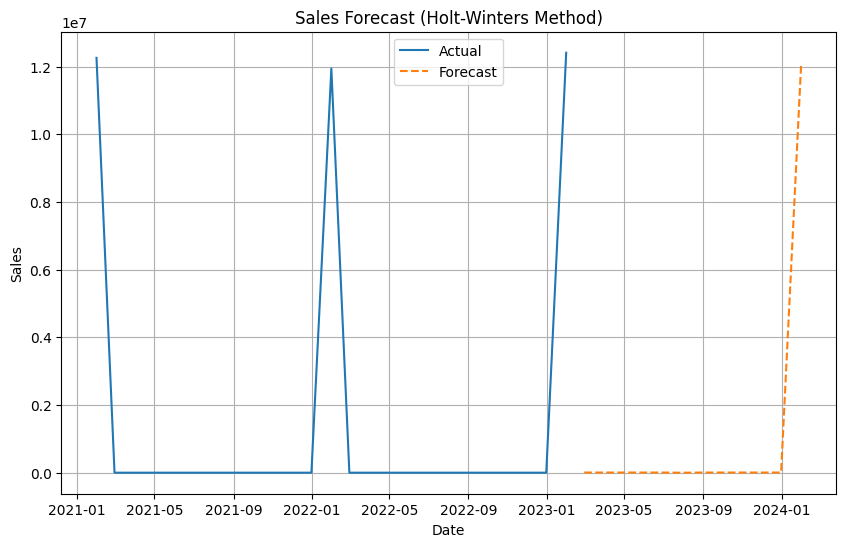

In [8]:
model = ExponentialSmoothing(monthly_sales, seasonal='additive', seasonal_periods=12).fit()

# Forecast next 12 months
forecast = model.forecast(12)

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_sales, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Sales Forecast (Holt-Winters Method)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


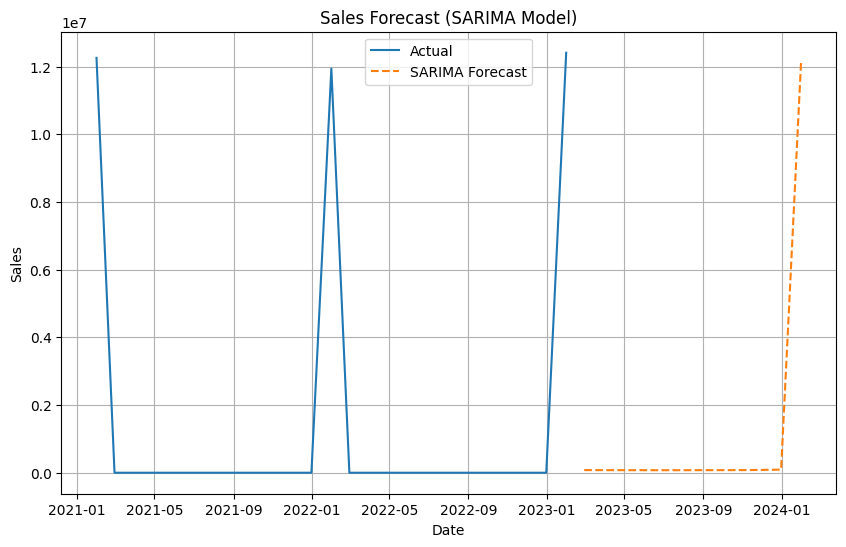

In [9]:
sarima_model = SARIMAX(monthly_sales, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

# Forecast next 12 months
sarima_forecast = sarima_model.get_forecast(steps=12)
sarima_pred = sarima_forecast.predicted_mean

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_sales, label='Actual')
plt.plot(sarima_pred, label='SARIMA Forecast', linestyle='--')
plt.title('Sales Forecast (SARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
